Created on Thu Jan 28 13:34:59 2021

@author: **Soumya Bhattacharya**

email: bhattacharya.soumya.ou@gmail.com

Portfolio Optimization 

Portfolio optimization is the process of selecting the best portfolio, out of the set of portfolios being considered, according to some objective. The objective typically maximizes factors such as expected return, and minimizes costs like financial risk. Here, we are optimizing user portfolio using Efficient Frontire

**Installing the Python module for portfolio optimization**


In [1]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 3.7MB/s 


**Importing other necessary modules**

In [2]:
import sys
import matplotlib
from pypfopt import EfficientFrontier # if the module is not installed: pip install PyPortfolioOpt
from pypfopt import risk_models # if the module is not installed: pip install PyPortfolioOpt
from pypfopt import expected_returns # if the module is not installed: pip install PyPortfolioOpt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime

plt.style.use('fivethirtyeight')

print(' ')
print('---------------------------- Version of the Modules Used ---------------------------')
print(' ')
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib. __version__))
print(' ')

 
---------------------------- Version of the Modules Used ---------------------------
 
Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Numpy: 1.19.5
Pandas: 1.1.5
Matplotlib: 3.2.2
 


**Creating Portfolio**

  Here, we are creating a portfolio consists of several stocks. Initially, all the stocks have the same weight in the portfolio. Later, we will optimize this portfolio to adjust the weights of the individual stocks to maximize returns and minimize rish. We use *Yahoo* to get historical stock data from 2013-01-01 until today. We organize the adjusted close price for the stock using a Pandas dataframe where the columns are the stocks in the portfolio and the rows are the adjusted close price for each date.
  
  Example: We are creating an example portfolio consisting of the five most popular and best performing companies in tech industry: FaceBook, Amazon, Apple, Netflix, and Google (FAANG)

In [4]:
# creating a variable called 'assets' that contains a list of the five stock symbols
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

# now we will assign weights for the stocks in the portfolio. the sum of the 
# weights should add up to 1 (100%). we will start with equal weights for each stocks.
# that means each stock is 20% of the portfolio
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# define the starting date for the portfolio (stocks)
StockStartDate = '2013-01-01'

# define the ending date for the portfolio (stocks), usually today's date
StockEndDate = datetime.today().strftime('%Y-%m-%d')

print('Todays date is: ', StockEndDate)

# creating a dataframe for the adjusted close price of the stocks
df = pd.DataFrame() # data frame object
# storing the adjusted close price of the stocks in the data frame
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = StockStartDate, 
                               end = StockEndDate)['Adj Close']

print(' ')
print('The data frame looks like this: ')
print(' ')
df

Todays date is:  2021-01-30
 
The data frame looks like this: 
 


,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.380499,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327972,13.880000,365.280823
...,...,...,...,...,...
2021-01-25,278.010010,3294.000000,142.919998,556.780029,1899.400024
2021-01-26,282.049988,3326.129883,143.160004,561.929993,1917.239990
2021-01-27,272.140015,3232.580078,142.059998,523.280029,1830.790039


**Visualizing the portfolio by plotting historical adjusted close price of the stocks**

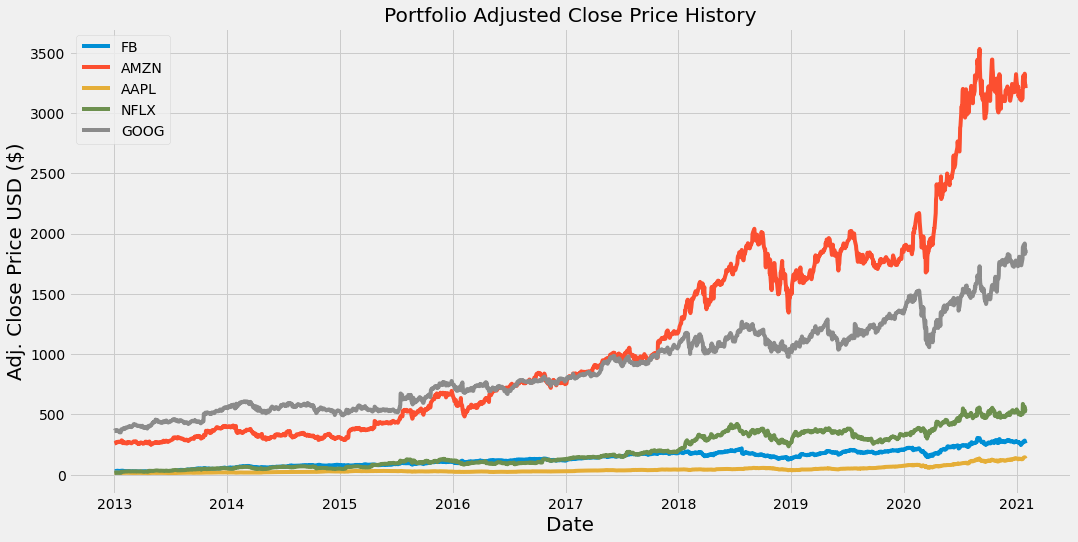

In [5]:
plt.figure(figsize=(16,8)) # creating a figure for plotting data
# looping all the columns in the data frame
for c in df.columns.values:
    plt.plot(df[c], label = c) # plotting the data

plt.title('Portfolio Adjusted Close Price History') # title of the plot
plt.xlabel('Date', fontsize=20) # label for the x axis
plt.ylabel('Adj. Close Price USD ($)', fontsize=20) # label for the y axis
plt.legend(df.columns.values, loc = 'upper left') # legends for the plot
plt.show()

**Calculating Daily Returns for the Stock**

returns = new_price/old_price - 1, so the first element would be 'NaN'

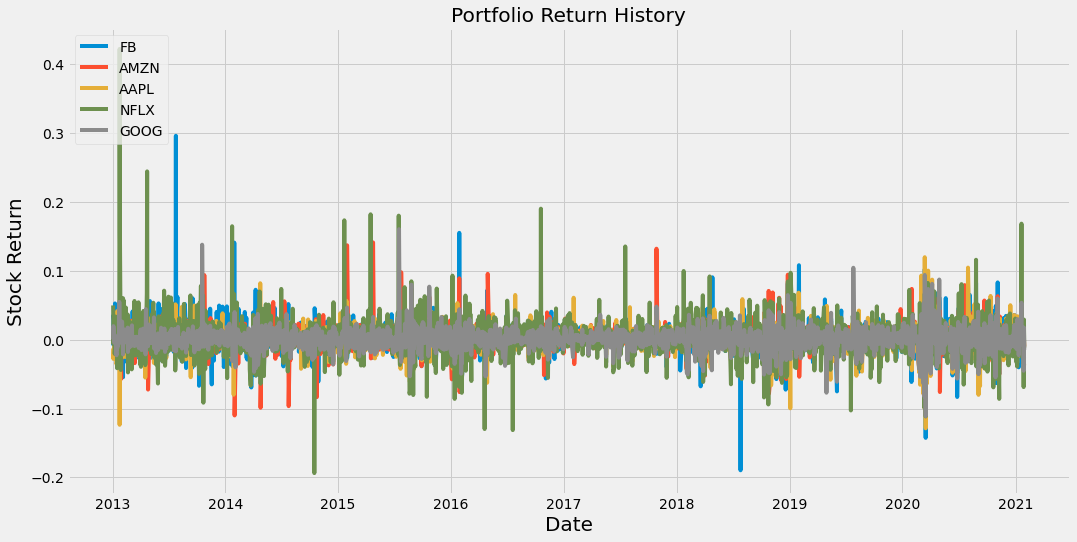

In [6]:
returns = df.pct_change() # pct_change is for percentage change, data frame object

plt.figure(figsize=(16,8)) # creating a figure for plotting data
# looping all the columns in the data frame
for c in returns.columns.values:
    plt.plot(returns[c], label = c) # plotting the data

plt.title('Portfolio Return History') # title of the plot
plt.xlabel('Date', fontsize=20) # label for the x axis
plt.ylabel('Stock Return', fontsize=20) # label for the y axis
plt.legend(returns.columns.values, loc = 'upper left') # legends for the plot
plt.show()

**Create & Displaying the Annualized Covarience Matrix**

Covarience matrix is bacically measure of how two random variables move together, hence co-vary. Here, it is the directional relationship between two asset/stock prices

1. The diagonal elements of a covarience matrix is the varience of each stock price (fluctuaton in each stock price) (the sqrt of varience is the volatility/risk)
2. The off-diagonal elements of a covarience matrix is the covarience the stock price (e.g. how FB stock price influence the AAPL price and so on)

In [8]:
annual_trading_days = 252 # number of treading days for this year (2021)

cov_matrix_annual = returns.cov()

print(' ')
print('Initial Covarience Matrix of the Portfolio')
print(' ')
cov_matrix_annual

 
Initial Covarience Matrix of the Portfolio
 


,FB,AMZN,AAPL,NFLX,GOOG
FB,0.000472,0.000219,0.000180,0.000227,0.000201
AMZN,0.000219,0.000373,0.000159,0.000255,0.000190
AAPL,0.000180,0.000159,0.000327,0.000142,0.000154
NFLX,0.000227,0.000255,0.000142,0.000848,0.000198
GOOG,0.000201,0.000190,0.000154,0.000198,0.000263


**Evaluating Initial Portfolio before Optimization**

We want to know the following three things for a portfolio:
1. Expected Annual Return
2. Volatility / Risk
3. Varience

In [10]:
#                       1. expected annual return
PortfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * annual_trading_days
# percentage return
percent_return = str(round(PortfolioSimpleAnnualReturn, 2) * 100) + '%'
print(' ')
print('Annual Expected Return (Initial): ', percent_return)

#                              3. varience
# calculating the portfolio varience: weights^T * cov_matrix_annual * weights
# where weights^T is the transpose of the weights
port_varience = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
percent_varience = str(round(port_varience, 4) * 100) + '%'
print('Annual Varience (Initial): ', percent_varience)
 
#                           2. volatility / risk
port_volatility = np.sqrt(port_varience)
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
print('Annual Volatility/Risk (Initial): ', percent_volatility)

 
Annual Expected Return (Initial):  36.0%
Annual Varience (Initial):  0.02%
Annual Volatility/Risk (Initial):  2.0%


**Optimizing the Portfolio by Maximizing the Sharpe Ratio**

The defination of the sharpe ratio can be found [here](https://en.wikipedia.org/wiki/Sharpe_ratio). The sharpe ratio is basically the measurement of the performance of an investment compared to a risk free invstment (bonds or treasury bills).

In [11]:
mu = expected_returns.mean_historical_return(df) # expected returns
S = risk_models.sample_cov(df) # annualized sample covarience matrix of asset returns

ef = EfficientFrontier(mu, S) # (object) optimize for max sharpe ratio
max_sharp_raw_weights = ef.max_sharpe() # raw weights from the optimization
cleaned_weights = ef.clean_weights()

print('Optimized Weights for Each Stocks/Assets in the Portfolio after Maximizing Sharpe Ratio')
print(' ')
print(cleaned_weights)

print(' ')
print('--------------------------- Optimized Model Parameters ---------------------------')
print(' ')
ef.portfolio_performance(verbose = True) # to show optimized expected annual return, annual volitility, and sharpe ratio

Optimized Weights for Each Stocks/Assets in the Portfolio after Maximizing Sharpe Ratio
 
OrderedDict([('FB', 0.05467), ('AMZN', 0.31193), ('AAPL', 0.28986), ('NFLX', 0.34354), ('GOOG', 0.0)])
 
--------------------------- Optimized Model Parameters ---------------------------
 
Expected annual return: 41.5%
Annual volatility: 27.4%
Sharpe Ratio: 1.44


(0.4154928566620647, 0.27435184787503225, 1.4415534640109746)

**Discrete Allocation for Each Share Per Stock**

Here, we can specify the total portfolio value that we want to invest and the model will give suggestion on how much of the total value should be distributed among the stocks that maximizes the Sharpe Ratio, and the leftover value/investment. The model will suggest us how many shares for each stock we should buy and the leftover on the optimized portfolio.

In [12]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

optimized_weights = cleaned_weights # weights of the stocks determized by maximizing the Sharpe Ratio
latest_prices = get_latest_prices(df) # today's price of the stock
Total_Investment = 15000 # in USD

da = DiscreteAllocation(optimized_weights, latest_prices, total_portfolio_value = Total_Investment) # object

Allocation, Leftover = da.lp_portfolio()

print('Discrete Allocation (# of share(s) for each stock):', Allocation)
print('Remaining Fund: ${:.2f}'.format(Leftover))

Discrete Allocation (# of share(s) for each stock): {'FB': 4, 'AMZN': 1, 'AAPL': 33, 'NFLX': 10}
Remaining Fund: $1081.90
